In [96]:
# Import the required modules

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from pathlib import Path

In [97]:
# Read in Excel file

file = Path("Data_Sources/Credit_Data.xls")
df = pd.read_excel(file, sheet_name="Data")

In [98]:
# Separate Features and Outcome

outcome = df["DEFAULT"]
features = df.drop(columns = ["OBS#", "DEFAULT"])

In [99]:
# Transfrom Categorical Variables

chk_acct_dummies = pd.get_dummies(features["CHK_ACCT"])
chk_acct_dummies.rename(columns={0: "CHK_0", 1: "CHK_1", 2: "CHK_2", 3: "CHK_3"}, inplace = True)

history_dummies = pd.get_dummies(features["HISTORY"])
history_dummies.rename(columns={0: "HIST_0", 1: "HIST_1", 2: "HIST_2", 3: "HIST_3", 4: "HIST_4"}, inplace = True)

sav_acct_dummies = pd.get_dummies(features["SAV_ACCT"])
sav_acct_dummies.rename(columns={0: "SAV_0", 1: "SAV_1", 2: "SAV_2", 3: "SAV_3", 4: "SAV_4"}, inplace = True)

employ_dummies = pd.get_dummies(features["EMPLOYMENT"])
employ_dummies.rename(columns={0: "EMP_0", 1: "EMP_1", 2: "EMP_2", 3: "EMP_3", 4: "EMP_4"}, inplace = True)

resident_dummies = pd.get_dummies(features["PRESENT_RESIDENT"])
resident_dummies.rename(columns={1: "RES_0", 2: "RES_1", 3: "RES_2", 4: "RES_3"}, inplace = True)

job_dummies = pd.get_dummies(features["JOB"])
job_dummies.rename(columns={0: "JOB_0", 1: "JOB_1", 2: "JOB_2", 3: "JOB_3"}, inplace = True)

dummies_merged = pd.concat([chk_acct_dummies, history_dummies, sav_acct_dummies, employ_dummies, resident_dummies, job_dummies], axis=1)


In [111]:
# Update Features with Dummies Data Frames

features_dropcat = features.drop(columns=["CHK_ACCT", "HISTORY", "SAV_ACCT", "EMPLOYMENT", "PRESENT_RESIDENT", "JOB"])
features_encoded = pd.concat([features_dropcat, dummies_merged], axis = 1)

In [101]:
# Split Feature Data into Training and Testing Sets

features_train, features_test, outcome_train, outcome_test = train_test_split(features_encoded, outcome, random_state=78)


In [102]:
# Scale Data

scaler = StandardScaler()
features_scaler = scaler.fit(features_train)
features_train_scaled = features_scaler.transform(features_train)
features_test_scaled = features_scaler.transform(features_test)


In [103]:
# Create Logistic Regression Model with Training Data

classifier = LogisticRegression(solver='lbfgs',
                                max_iter=200,
                                random_state=1)

classifier.fit(features_train_scaled, outcome_train)

predictions = classifier.predict(features_test_scaled)

print(f"Training Data Score: {classifier.score(features_train_scaled, outcome_train)}")


Training Data Score: 0.804


In [104]:
# Make Predictions with Test Data  (Threshold = 50%)

predictions = classifier.predict(features_test_scaled)

test_results = pd.DataFrame({"Prediction": predictions, "Actual": outcome_test}).reset_index(drop=True)

print(f"Test Data Score: {classifier.score(features_test_scaled, outcome_test)}")


Test Data Score: 0.74


In [105]:
# Determine Probabilities of Test Data Outcomes with Model

pred_proba_df = pd.DataFrame(classifier.predict_proba(features_test_scaled))
pred_proba_df


,0,1
0,0.890607,0.109393
1,0.681305,0.318695
2,0.361978,0.638022
3,0.911723,0.088277
4,0.848972,0.151028
...,...,...
245,0.893352,0.106648
246,0.610139,0.389861
247,0.794537,0.205463
248,0.828787,0.171213


In [106]:
# Determine Model Accuracy for Different Thresholds

threshold_list = [0.05, 0.10, 0.15, 0.20, 0.25, 0.30, 0.35, 0.40, 0.45, 0.50, 0.55, 0.60, 0.65, 0.70, 0.75, 0.80, 0.85, 0.90, 0.95]

for i in threshold_list:
    print (f'\n***** For Threshold = {i} *****')
    outcome_test_pred = pred_proba_df.applymap(lambda x: 1 if x > i else 0)
    test_accuracy = accuracy_score(outcome_test.values.reshape(outcome_test.values.size,1),
                                    outcome_test_pred.iloc[:,1].values.reshape(outcome_test_pred.iloc[:,1].values.size,1))
    print(f"Test Accuracy for Threshold = {i}: {test_accuracy}")
    print(confusion_matrix(outcome_test.values.reshape(outcome_test.values.size,1),
                                    outcome_test_pred.iloc[:,1].values.reshape(outcome_test_pred.iloc[:,1].values.size,1)))


***** For Threshold = 0.05 *****
Test Accuracy for Threshold = 0.05: 0.448
[[ 36 137]
 [  1  76]]

***** For Threshold = 0.1 *****
Test Accuracy for Threshold = 0.1: 0.568
[[ 68 105]
 [  3  74]]

***** For Threshold = 0.15 *****
Test Accuracy for Threshold = 0.15: 0.636
[[90 83]
 [ 8 69]]

***** For Threshold = 0.2 *****
Test Accuracy for Threshold = 0.2: 0.672
[[104  69]
 [ 13  64]]

***** For Threshold = 0.25 *****
Test Accuracy for Threshold = 0.25: 0.696
[[115  58]
 [ 18  59]]

***** For Threshold = 0.3 *****
Test Accuracy for Threshold = 0.3: 0.704
[[121  52]
 [ 22  55]]

***** For Threshold = 0.35 *****
Test Accuracy for Threshold = 0.35: 0.708
[[127  46]
 [ 27  50]]

***** For Threshold = 0.4 *****
Test Accuracy for Threshold = 0.4: 0.704
[[133  40]
 [ 34  43]]

***** For Threshold = 0.45 *****
Test Accuracy for Threshold = 0.45: 0.712
[[140  33]
 [ 39  38]]

***** For Threshold = 0.5 *****
Test Accuracy for Threshold = 0.5: 0.74
[[149  24]
 [ 41  36]]

***** For Threshold = 0.

In [109]:
# Determine Feature Importance (Coefficients)

coefficients = classifier.coef_[0]

feature_importance = pd.DataFrame({'Feature': features_encoded.columns, 'Importance': np.abs(coefficients)})
feature_importance = feature_importance.sort_values('Importance', ascending=True)
feature_importance

<Axes: ylabel='Feature'>

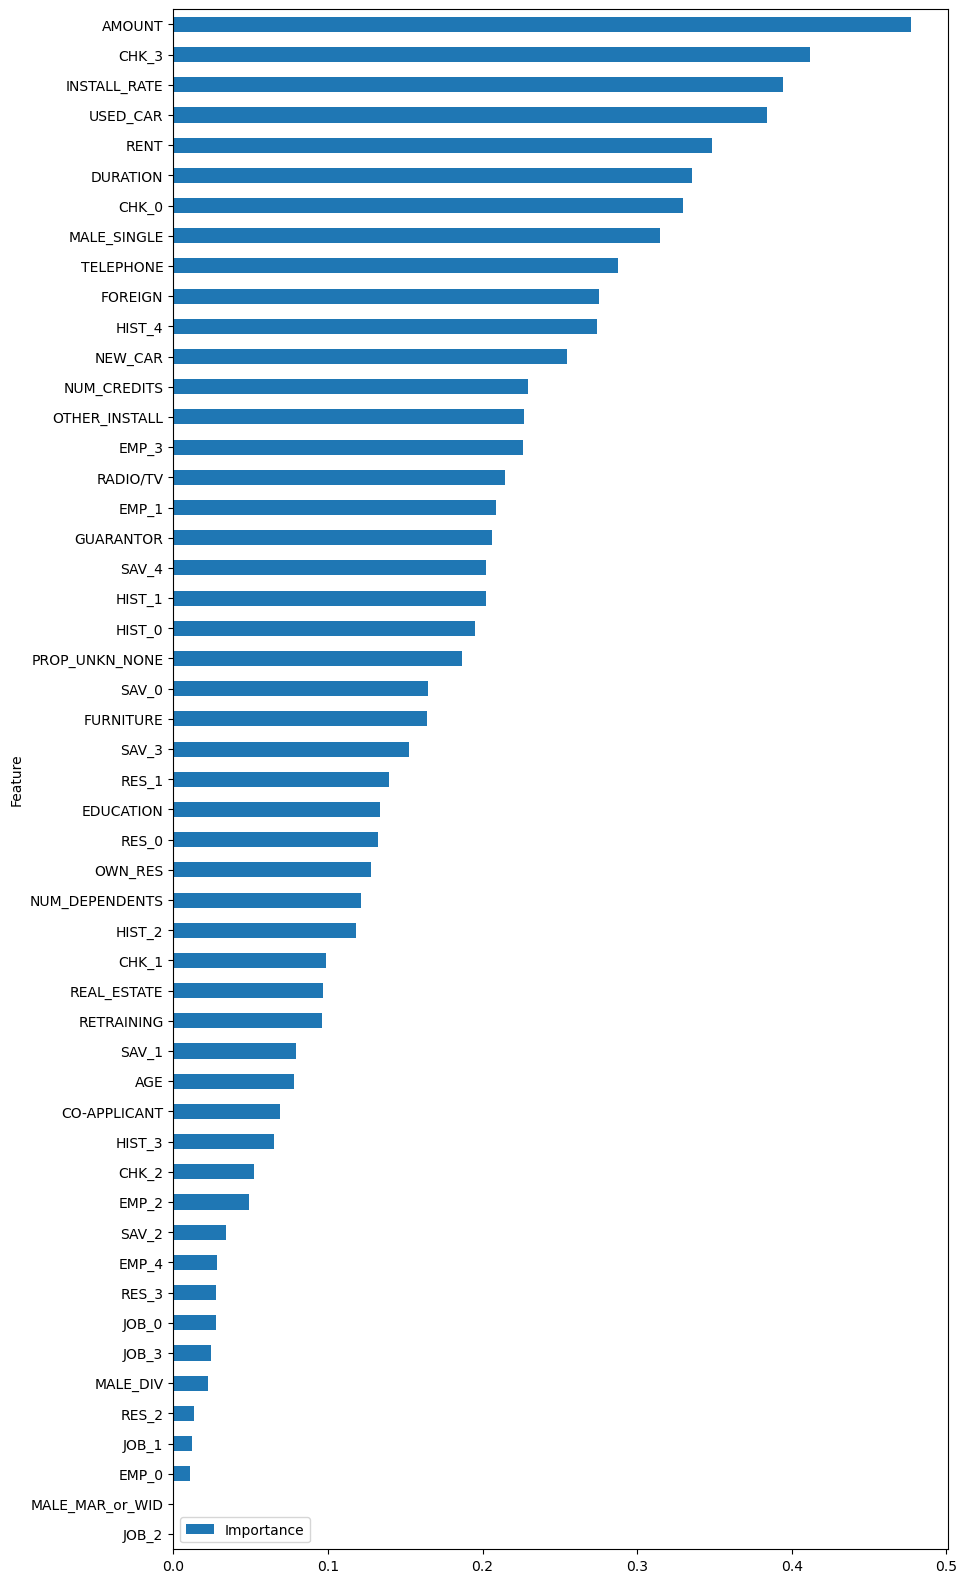

In [108]:
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 20))